# **Aprendizado de Máquina** <BR>**Aula 04** - Regressão logística binária e problemas de classificação

# **Ex1** Classificação de origens dos automóveis

## **1)** Importação de bibliotecas e classes

In [ ]:
# Bibliotecas de uso geral (cálculos, manipulação de dados e geração de gráficos)
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [ ]:
# Bibliotecas específicas de Machine Learning
from sklearn.model_selection import train_test_split    # Divisão de dados (treino/teste)
from sklearn.model_selection import cross_val_score     # Validação cruzada k-folds
from sklearn.linear_model import LogisticRegression     # Regressão logística

## **2)** Leitura de dados e exploração inicial

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# OBSERVAÇÕES: "monte" o disco e ajuste o caminho
# do arquivo de dados antes da executar esta célula!

caminho_arquivo = "/content/drive/MyDrive/Colab Notebooks/Aula2_ML/A02Ex1_carros.csv"
df = pd.read_csv(caminho_arquivo)
display(df)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,USA,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,USA,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,USA,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,USA,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,USA,ford torino
...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86,2790,15.6,82,USA,ford mustang gl
388,44.0,4,97.0,52,2130,24.6,82,Europe,vw pickup
389,32.0,4,135.0,84,2295,11.6,82,USA,dodge rampage
390,28.0,4,120.0,79,2625,18.6,82,USA,ford ranger


### **2.1)** Características gerais

In [ ]:
# Contagem de classes da resposta/target
df['origin'].value_counts()

,count
origin,
USA,245
Asia,79
Europe,68


## **3)** Pré-processamento e seleção de variáveis

### **3.1)** Pré - processamento: criação da nova coluna de origens

In [ ]:
df['origem2'] = df['origin']  # Copia a informação original

# Sintaxe do método 'loc'
# dataframe.loc[ condição a ser testada, coluna a ter valor atribuído] = valor
df.loc[df['origin'] != "USA", 'origem2'] = "NON_USA"

# Chegagem de classes
df['origem2'].value_counts()

,count
origem2,
USA,245
NON_USA,147


In [ ]:
# Exibição do dataframe modificado
display(df)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,origem2
0,18.0,8,307.0,130,3504,12.0,70,USA,chevrolet chevelle malibu,USA
1,15.0,8,350.0,165,3693,11.5,70,USA,buick skylark 320,USA
2,18.0,8,318.0,150,3436,11.0,70,USA,plymouth satellite,USA
3,16.0,8,304.0,150,3433,12.0,70,USA,amc rebel sst,USA
4,17.0,8,302.0,140,3449,10.5,70,USA,ford torino,USA
...,...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86,2790,15.6,82,USA,ford mustang gl,USA
388,44.0,4,97.0,52,2130,24.6,82,Europe,vw pickup,NON_USA
389,32.0,4,135.0,84,2295,11.6,82,USA,dodge rampage,USA
390,28.0,4,120.0,79,2625,18.6,82,USA,ford ranger,USA


### **3.1)** Seleção de atributos e resposta


In [ ]:
X = df.drop(columns = ['origin', 'car name', 'origem2'])  # Atributos: todos, exceto origens e nome
y = df['origem2']                                         # Resposta/target: origem binária

In [ ]:
# Checagem dos atributos
X.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
0,18.0,8,307.0,130,3504,12.0,70
1,15.0,8,350.0,165,3693,11.5,70
2,18.0,8,318.0,150,3436,11.0,70
3,16.0,8,304.0,150,3433,12.0,70
4,17.0,8,302.0,140,3449,10.5,70


### **3.2)** Divisão dos dados de treino e teste

In [ ]:
# Parâmetros da função 'train_test_split':
#   X,y = arrays (ou equivalentes) das variáveis independentes (X) e dependente (y)
#   train_size/test_size = percentual de dados de treino/teste. Padrão: 75% (treino) e 25% (teste)
#   random_state = controle da aleatoriedade da divisão (valor inteiro)
#     IMPORTANTE: sem o controle do parâmetro 'random_state', diferentes partições
#     do conjunto de dados serão retornadas a cada execução da função de divisão
#   stratify: variável que define a estratificação de classes a ser mantida
#
# Retorno:
#   Tupla (4 valores) dos atributos de treino e teste e respostas (idem)

X_treino, X_teste, y_treino, y_teste = train_test_split(X,y, random_state = 42,
                                                        stratify = y)

## **4)** Treinamento do <u>classificador</u> (modelo de regressão logística binária)

In [ ]:
clf_RL = LogisticRegression(max_iter = 500)   # Cria instância de um classificador por reg. log. binária
clf_RL.fit(X_treino,y_treino)   # Treina o classificador

# Exibição dos coeficientes do modelo
print("Beta0 =",clf_RL.intercept_)
print("Beta1 =",clf_RL.coef_)

Beta0 = [-11.55383793]
Beta1 = [[-0.14631259 -1.29498167  0.12392689 -0.03205266 -0.00557264  0.11477445
   0.25758451]]


In [ ]:
# Exibe o total de iterações do algoritmo de treinamento
print("Total de iterações =",clf_RL.n_iter_)

Total de iterações = [455]


## **5)** Validação cruzada *hold-out*

### **5.1)** Avaliação <u>preliminar</u> do classificador via acurácia de ressubstituição

In [ ]:
# Importação da biblioteca necessária para o cálculo da acurácia
from sklearn.metrics import accuracy_score

# Cálculo das previsões do classificador para os dados de treino (ressubstituição)
y_prev_treino = clf_RL.predict(X_treino)

# Acurácia "preliminar" (ressubstituição)
acc_prelim = accuracy_score(y_true = y_treino,y_pred = y_prev_treino)
print("Acurácia preliminar (dados de treino) =",acc_prelim)

Acurácia preliminar (dados de treino) = 0.8877551020408163


### **5.2)** Avaliação da capacidade de generalização via acurácia de teste

In [ ]:
# Cálculo das previsões do classificador para os dados de treino (ressusbstituição)
y_prev_teste = clf_RL.predict(X_teste)

# e a acurácia correspondente
y_prev_teste = clf_RL.predict(X_teste)
acc_teste = accuracy_score(y_true = y_teste,y_pred = y_prev_teste)
print("Acurácia =",acc_teste)

Acurácia = 0.8877551020408163


### **5.3)** Matriz de confusão e relatório de métricas

In [ ]:
# Exibição "básica" da matriz de confusão
# Importação da função de cálculo
from sklearn.metrics import confusion_matrix

confusion_matrix(y_true = y_teste,y_pred = y_prev_teste)

array([[35,  2],
       [ 9, 52]])

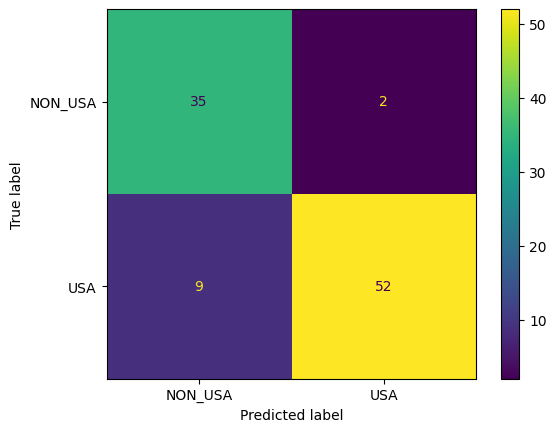

In [ ]:
# Representação "gráfica" da matriz de confusão
# Importação da função de exibição
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_true = y_teste,
                                        y_pred = y_prev_teste)
plt.show()

In [ ]:
# Relatório das métricas de qualidade
from sklearn.metrics import classification_report

print(classification_report(y_true = y_teste,y_pred = y_prev_teste,digits = 4))

              precision    recall  f1-score   support

     NON_USA     0.7955    0.9459    0.8642        37
         USA     0.9630    0.8525    0.9043        61

    accuracy                         0.8878        98
   macro avg     0.8792    0.8992    0.8843        98
weighted avg     0.8997    0.8878    0.8892        98



### **5.4)** Curva ROC

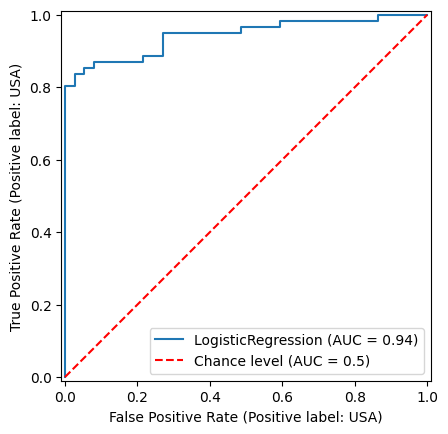

In [ ]:
# Importação da função necessária
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(estimator = clf_RL,X = X_teste,y = y_teste,
                               plot_chance_level = True,
                               chance_level_kw = dict(color = 'red'))
plt.show()

## **6)** Validação K - folds

In [ ]:
# Importação da bilioteca necessária
from sklearn.model_selection import cross_val_score

# Parâmetros da função 'cross_val_score':
#   estimator = estimador de alguma classe reconhecida (Scikit-Learn)
#   X,y = atributos (X) e resposta (y)
#   cv = número [inteiro] de partições (k); valor padrão: k = 5
#   scoring = texto indicativo da métrica de qualidade a ser calculada (teste)
#     https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-string-names
#
# Retorno:
#   array (Numpy) com os k valores da métrica selecionada

# Executa a validação cruzada k-folds, com k = 5, avaliando a métrica de acurácia
aval = cross_val_score(clf_RL,X,y,cv = 5,scoring = 'accuracy')

# Calcula o coeficiente de variação das avaliações = desvio padrão/média
# Critério:
# Até 20%: variação baixa
# De 20% a 60%: variação moderada
# Acima de 60%: variação alta

print("Valores de acurácia obtidos:",aval)
print("")   # "Imprime" uma linha em branco
print("Acurácia médio =",aval.mean())
print("Coeficiente de variação (%) =",100*aval.std(ddof = 1)/aval.mean())

Valores de acurácia obtidos: [0.93670886 0.93670886 0.88461538 0.87179487 0.73076923]

Acurácia médio = 0.8721194417396948
Coeficiente de variação (%) = 9.67524364557199


---
**Fim do Ex 1 da Aula 04**